In [22]:
from langchain_openai import ChatOpenAI

from dotenv import load_dotenv
import os
load_dotenv()

if os.environ['OPENAI_API_KEY']:
    print("OpenAI API Key is set.")
else:
    raise ValueError("OpenAI API Key is not set.")

OpenAI API Key is set.


In [23]:
llm = ChatOpenAI(model="gpt-5-nano")
llm.invoke("I want to know the meaning of water").content


'Do you want the definition from a scientific, linguistic, or symbolic/cultural perspective? I can cover all, or focus on one. Here are quick overviews in case that helps:\n\n- Scientific meaning\n  - Water is a chemical substance with the formula H2O: two hydrogen atoms bonded to one oxygen atom.\n  - It exists in three states—solid (ice), liquid (water), and gas (water vapor)—and has unique properties like high polarity, hydrogen bonding, high surface tension, and density that changes with temperature (ice is less dense than liquid water).\n  - It’s the universal solvent in biology and chemistry, essential for all known forms of life, and participates in the water cycle (evaporation, condensation, precipitation, and collection).\n\n- Etymology/linguistic meaning\n  - The English word “water” comes from Old English wæter, from Proto-Germanic *watōr. Many languages have similar-sounding roots (e.g., agua in Spanish, eau in French, agua in Portuguese, Wasser in German).\n\n- Symbolic/cu

### **Schema**

In [24]:
from typing import TypedDict, List

class graph_schema(TypedDict):
    
    topic: str
    insta: str
    twitter: str
    linkedin: str

In [25]:
def create_post_insta(state: graph_schema) -> graph_schema:
    

    # Extract the topic from the state
    topic = state['topic']

    # Passing the topic to the LLM to generate an Instagram post
    post = llm.invoke(f"Write an Instagram post about {topic}. Keep the tone casual and engaging.").content

    # Update the state with the generated post
    state['insta'] = post

    return {'insta' : post}

def create_post_twitter(state: graph_schema) -> graph_schema:
    

    # Extract the topic from the state
    topic = state['topic']

    # Passing the topic to the LLM to generate a Twitter post
    post = llm.invoke(f"Write a Twitter post about {topic}. Keep the tone quick").content

    # Update the state with the generated post
    state['twitter'] = post

    return {'twitter' : post}


def create_post_linkedin(state: graph_schema) -> graph_schema:
    

    # Extract the topic from the state
    topic = state['topic']

    # Passing the topic to the LLM to generate a LinkedIn post
    post = llm.invoke(f"Write a LinkedIn post about {topic}. Keep the tone professional and informative.").content

    # Update the state with the generated post
    state['linkedin'] = post

    return {'linkedin' : post}


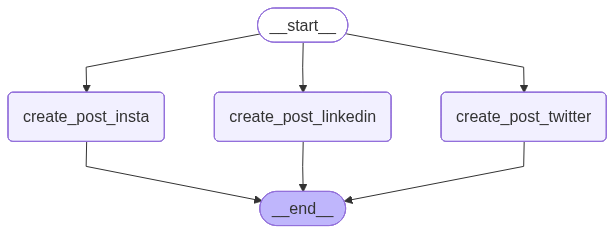

In [26]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(graph_schema)

graph.add_node("create_post_insta", create_post_insta)
graph.add_node("create_post_twitter", create_post_twitter)
graph.add_node("create_post_linkedin", create_post_linkedin)


graph.add_edge(START, "create_post_insta")
graph.add_edge(START, "create_post_twitter")
graph.add_edge(START, "create_post_linkedin")
graph.add_edge("create_post_insta", END)
graph.add_edge("create_post_twitter", END)
graph.add_edge("create_post_linkedin", END)

parallel_graph = graph.compile()



from IPython.display import Image, display

# You could see the errors with the below command
Image(parallel_graph.get_graph().draw_mermaid_png())

In [27]:
parallel_graph.invoke({"topic": "Artificial Intelligence",
                    "insta": "",
                    "twitter": "",
                    "linkedin": ""})

{'topic': 'Artificial Intelligence',
 'insta': 'AI finally feels less sci‑fi and more everyday magic. 🤖✨ It’s in the apps we use, the art we create, and the problems we solve in seconds that used to take hours. I love how it acts as a creative co-pilot—sharing ideas, testing options, and pushing us to think bigger. Remember: it’s a tool to amplify human talent, not replace it. What’s the coolest AI thing you’ve discovered lately? Drop it in the comments and tell me why you’re excited about it. #AI #ArtificialIntelligence #TechLife #AICreativity #FutureOfWork #TechTrend #Innovation',
 'twitter': 'AI is moving fast. Smarter tools, faster decisions, bigger ideas—everywhere we work, learn, and create. Stay curious, ask questions, stay human.',
 'linkedin': "Artificial Intelligence is not a distant future—it's a practical catalyst shaping decision-making, efficiency, and value across industries today. The most successful AI efforts align with business goals, emphasize data governance, and p